In [46]:
import math
import numpy as np
import matplotlib.pyplot as plt
import entrezpy.conduit
from Bio import SeqIO


In [47]:
#Function Load Genome File '.fna"
#returns list of chromoses where each index contains the sequence of chromosome n

def chromosome_load(filename):
    with open(filename) as genome_file:
        chromosomes = []
        for record in SeqIO.parse(genome_file, "fasta"):
            if record.id[0:2] == 'NC': #NC represents chromosome annotation
                chromosomes.append(record)
    return chromosomes

In [33]:
# load human genome data

human_chromosomes = chromosome_load("/Users/willcheney/GRCh38_latest_genomic.fna")
        

In [48]:
with open("/Users/willcheney/sacc_R64_genomic.fna") as genome_file:
    yeast_chromosomes = []
    counter = 1
    for record in SeqIO.parse(genome_file, "fasta"):
        yeast_chromosomes.append(record)


In [49]:

candida_chromosomes = chromosome_load("candida_ASM18296v3_genomic.fna")

In [50]:
# Generates a random sample of genome sequences of size bps
# Bps determines length of sample (number of base pairs)
# Chr_sample determines how many chromosomes to sample
# sequence_sample determines how many samples per chromosomes
# total number of samples = chr_sample * sequence_sample
# returns list of samples with each index contain a continous DNA seqence of size bps

def seq_sample(chromosomes, bps = 50000, chr_sample = 3, sequence_sample = 3):

    random_chr = []
    for i in range(chr_sample):
        random_chr.append(np.random.randint(0,len(chromosomes)))
    print(random_chr)
    samples = []
    for i in random_chr:
        for k in range(sequence_sample):
            j = np.random.randint(0,len(chromosomes[i]))
            if (j + bps) > len(chromosomes[i]): #Check for out of bounds error  
                j = len(chromosomes[i]) - bps
            samples.append(chromosomes[i].seq[j: (j + bps)])
    
    return samples
        

In [54]:
samples = seq_sample(yeast_chromosomes[0:(len(yeast_chromosomes)-1)],50000, 10, 3)

[10, 8, 10, 9, 5, 14, 14, 13, 11, 4]


In [20]:
len(human_chromosomes)

25

In [52]:
# Generates points for CGR representation of sequence
# Steps through Chaos game for DNA sequence

def dna_cgr(sequence):
    
    sequence = sequence.lower()
    
    #define vertex coordinates
    C = (-1,1)
    G = (1,1)
    A = (-1,-1)
    T = (1,-1)
    #inital point
    x = [0]
    y = [0]

    for i in list(sequence):
        #for each step add a new point half way between the previous point and the vertex for bp i
        if i == "n":
            continue
        elif i == "a":
            nextx = (x[-1] + A[0])/2
            nexty = (y[-1] + A[1])/2
            x.append(nextx)
            y.append(nexty)

        elif i == "t":
            nextx = (x[-1] + T[0]) / 2
            nexty = (y[-1] + T[1]) / 2
            x.append(nextx)
            y.append(nexty)

        elif i == "c":
            nextx = (x[-1] + C[0]) / 2
            nexty = (y[-1] + C[1]) / 2
            x.append(nextx)
            y.append(nexty)

        elif i == "g":
            nextx = (x[-1] + G[0]) / 2
            nexty = (y[-1] + G[1]) / 2
            x.append(nextx)
            y.append(nexty)
            

    # returns list of points
    return x,y

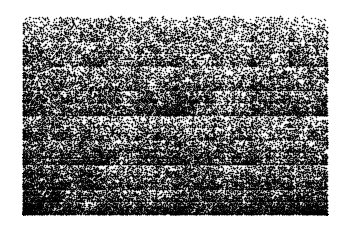

In [122]:
#Create scatter plot of points to generate image
x,y = dna_cgr(samples[0])
plt.scatter(x,y, s = 0.2, color = 'black', alpha = 1)
plt.axis('off')
fig = plt.gcf()
plt.show()
    

In [55]:
#Loop to generate data set of CGR images

counter = 1
for i in samples:
    
    x,y = dna_cgr(i)
    plt.scatter(x,y, s = 0.1, color = 'black', alpha = 1)
    title = "yeast_test_" + str(counter)
    plt.axis('off')
    fig = plt.gcf()
    fig.savefig(title, dpi = 300, bbox_inches='tight')
    plt.close()
    counter += 1

In [83]:
fig.savefig('Human_sample_1', dpi = 300, bbox_inches='tight')